# Project 1 Report

## Team members: Manish Meshram

## Introduction

## Dataset

## Analysis technique

## Results


%%latex
\newpage

# Project 1 Code


## Comments relating to code snippet 1

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
people = pd.read_csv('baseballdatabank-master/core/People.csv', usecols=['playerID','nameFirst','nameLast','weight','debut'])
display(people.head())
display('Length of people:', len(people))

batting = pd.read_csv('baseballdatabank-master/core/Batting.csv', usecols=['playerID','R'])
batting

runs = batting.groupby('playerID')['R'].agg(['sum']).reset_index()
display(runs.head())
display('Length of sum runs:', len(runs))

runs_desc = runs.sort_values(['sum'], ascending=[False]).reset_index(drop=True)
display(runs_desc.head(10))

merged_df = runs_desc.merge(people, how = 'inner', on = ['playerID'])

# Adding full name
merged_df['name']= merged_df['nameFirst'] + ' ' +  merged_df['nameLast']
display(merged_df.head())

# Dropping NaN values
merged_df = merged_df.dropna()

# Adding debut year
merged_df['debutYear']= merged_df['debut'].str.split('-').str[0]
merged_df['debutYear'] = merged_df['debutYear'].astype('int')
display(merged_df.head())


,playerID,nameFirst,nameLast,weight,debut
0,aardsda01,David,Aardsma,215.0,2004-04-06
1,aaronha01,Hank,Aaron,180.0,1954-04-13
2,aaronto01,Tommie,Aaron,190.0,1962-04-10
3,aasedo01,Don,Aase,190.0,1977-07-26
4,abadan01,Andy,Abad,184.0,2001-09-10


'Length of people:'

19370

,playerID,sum
0,aardsda01,0
1,aaronha01,2174
2,aaronto01,102
3,aasedo01,0
4,abadan01,1


'Length of sum runs:'

19182

,playerID,sum
0,henderi01,2295
1,cobbty01,2246
2,bondsba01,2227
3,aaronha01,2174
4,ruthba01,2174
5,rosepe01,2165
6,mayswi01,2062
7,rodrial01,2021
8,ansonca01,1999
9,musiast01,1949


,playerID,sum,nameFirst,nameLast,weight,debut,name
0,henderi01,2295,Rickey,Henderson,180.0,1979-06-24,Rickey Henderson
1,cobbty01,2246,Ty,Cobb,175.0,1905-08-30,Ty Cobb
2,bondsba01,2227,Barry,Bonds,185.0,1986-05-30,Barry Bonds
3,aaronha01,2174,Hank,Aaron,180.0,1954-04-13,Hank Aaron
4,ruthba01,2174,Babe,Ruth,215.0,1914-07-11,Babe Ruth


,playerID,sum,nameFirst,nameLast,weight,debut,name,debutYear
0,henderi01,2295,Rickey,Henderson,180.0,1979-06-24,Rickey Henderson,1979
1,cobbty01,2246,Ty,Cobb,175.0,1905-08-30,Ty Cobb,1905
2,bondsba01,2227,Barry,Bonds,185.0,1986-05-30,Barry Bonds,1986
3,aaronha01,2174,Hank,Aaron,180.0,1954-04-13,Hank Aaron,1954
4,ruthba01,2174,Babe,Ruth,215.0,1914-07-11,Babe Ruth,1914


## Comments relating to code snippet 2

,playerID,sum,nameFirst,nameLast,weight,debut,name,debutYear
0,henderi01,2295,Rickey,Henderson,180.0,1979-06-24,Rickey Henderson,1979
1,cobbty01,2246,Ty,Cobb,175.0,1905-08-30,Ty Cobb,1905
2,bondsba01,2227,Barry,Bonds,185.0,1986-05-30,Barry Bonds,1986
3,aaronha01,2174,Hank,Aaron,180.0,1954-04-13,Hank Aaron,1954
4,ruthba01,2174,Babe,Ruth,215.0,1914-07-11,Babe Ruth,1914
5,rosepe01,2165,Pete,Rose,192.0,1963-04-08,Pete Rose,1963
6,mayswi01,2062,Willie,Mays,170.0,1951-05-25,Willie Mays,1951
7,rodrial01,2021,Alex,Rodriguez,230.0,1994-07-08,Alex Rodriguez,1994
8,ansonca01,1999,Cap,Anson,227.0,1871-05-06,Cap Anson,1871
9,musiast01,1949,Stan,Musial,175.0,1941-09-17,Stan Musial,1941


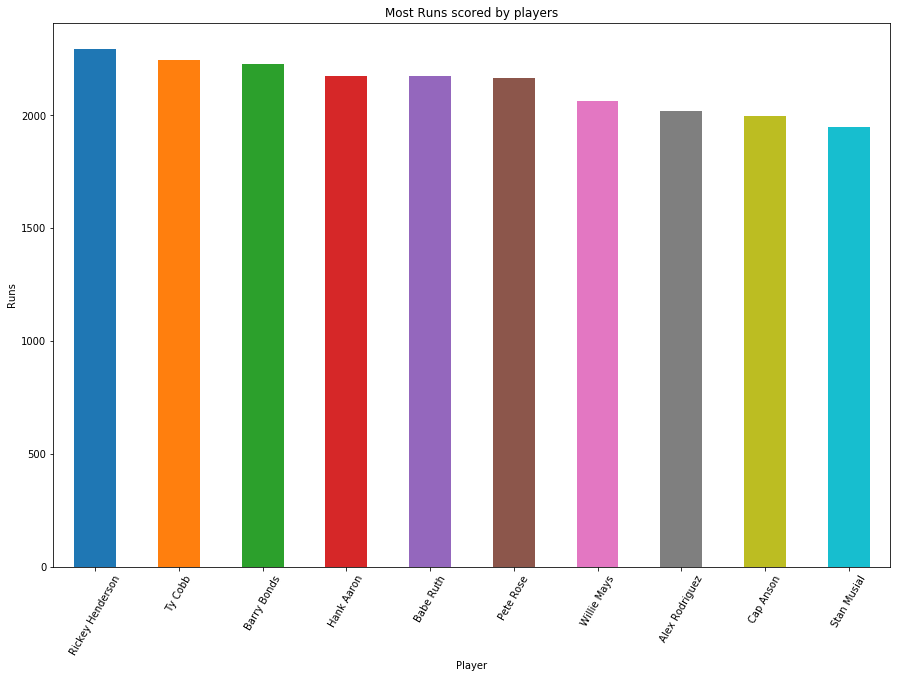

In [86]:
most_runs_df = merged_df[:10]
display(most_runs_df)

ax = most_runs_df.plot.bar(x='name', y='sum', rot=60, figsize=(15,10), legend=False)
plt.ylabel('Runs')
plt.xlabel('Player')
plt.title('Most Runs scored by players')
plt.show()

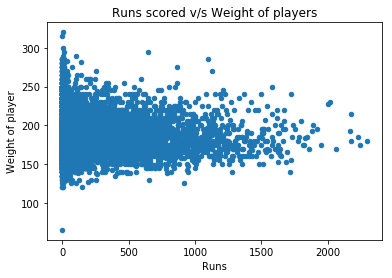

In [87]:
ax = merged_df.plot.scatter(x='sum', y='weight')
plt.xlabel('Runs')
plt.ylabel('Weight of player')
plt.title('Runs scored v/s Weight of players')
plt.show()

In [88]:
from sklearn import preprocessing
from scipy import stats

merged_df['sum_std'] = stats.zscore(merged_df['sum'])
merged_df['sum_norm'] = preprocessing.normalize([merged_df['sum']])[0]
merged_df['weight_std'] = stats.zscore(merged_df['weight'])
merged_df['weight_norm'] = preprocessing.normalize([merged_df['weight']])[0]

merged_df

,playerID,sum,nameFirst,nameLast,weight,debut,name,debutYear,sum_std,sum_norm,weight_std,weight_norm
0,henderi01,2295,Rickey,Henderson,180.0,1979-06-24,Rickey Henderson,1979,9.039421,0.063957,-0.305237,0.007056
1,cobbty01,2246,Ty,Cobb,175.0,1905-08-30,Ty Cobb,1905,8.837104,0.062592,-0.536247,0.006860
2,bondsba01,2227,Barry,Bonds,185.0,1986-05-30,Barry Bonds,1986,8.758655,0.062062,-0.074228,0.007252
3,aaronha01,2174,Hank,Aaron,180.0,1954-04-13,Hank Aaron,1954,8.539823,0.060585,-0.305237,0.007056
4,ruthba01,2174,Babe,Ruth,215.0,1914-07-11,Babe Ruth,1914,8.539823,0.060585,1.311829,0.008428
5,rosepe01,2165,Pete,Rose,192.0,1963-04-08,Pete Rose,1963,8.502663,0.060335,0.249186,0.007527
6,mayswi01,2062,Willie,Mays,170.0,1951-05-25,Willie Mays,1951,8.077385,0.057464,-0.767256,0.006664
7,rodrial01,2021,Alex,Rodriguez,230.0,1994-07-08,Alex Rodriguez,1994,7.908100,0.056322,2.004858,0.009016
8,ansonca01,1999,Cap,Anson,227.0,1871-05-06,Cap Anson,1871,7.817264,0.055708,1.866252,0.008899
9,musiast01,1949,Stan,Musial,175.0,1941-09-17,Stan Musial,1941,7.610818,0.054315,-0.536247,0.006860


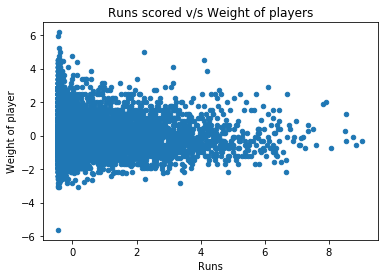

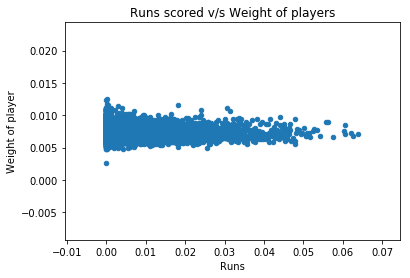

In [89]:
ax = merged_df.plot.scatter(x='sum_std', y='weight_std')
plt.xlabel('Runs')
plt.ylabel('Weight of player')
plt.title('Runs scored v/s Weight of players')
plt.show()


ax = merged_df.plot.scatter(x='sum_norm', y='weight_norm')
plt.xlabel('Runs')
plt.ylabel('Weight of player')
plt.title('Runs scored v/s Weight of players')
plt.show()

,minYear,maxYear,playersOnboarded,years
0,1870,1879,292,1870-1879
1,1880,1889,692,1880-1889
2,1890,1899,654,1890-1899
3,1900,1909,951,1900-1909
4,1910,1919,1508,1910-1919
5,1920,1929,1200,1920-1929
6,1930,1939,1038,1930-1939
7,1940,1949,1168,1940-1949
8,1950,1959,1070,1950-1959
9,1960,1969,1251,1960-1969


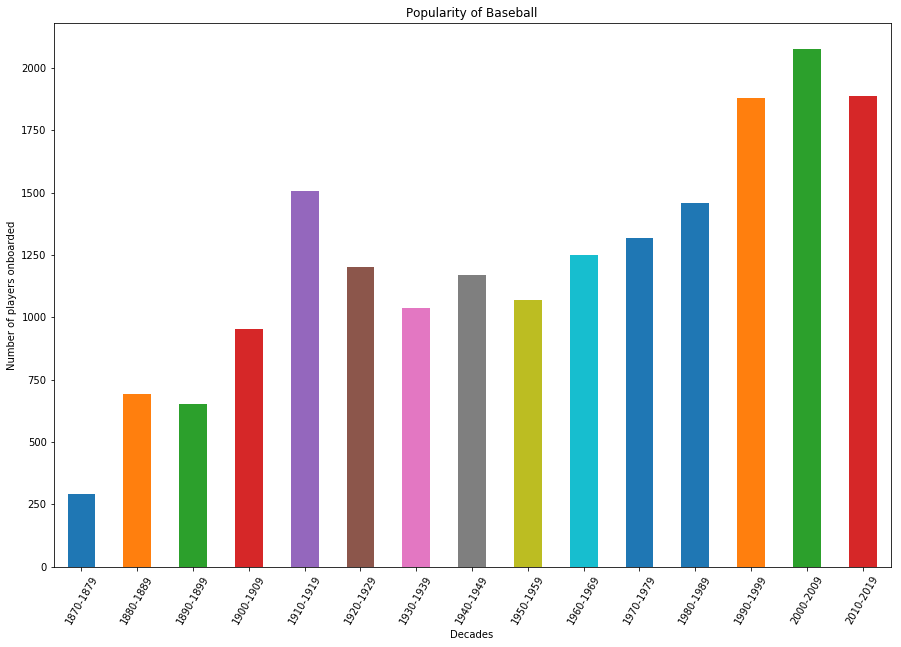

In [125]:
min_year = merged_df['debutYear'].min()
max_year = merged_df['debutYear'].max()

min_year
max_year

min_year = 1870
max_year = 2020

baseball_pop_df = pd.DataFrame(columns=['minYear','maxYear'])
df_index = 0

i = min_year
while(i < max_year):
    min_y = i
    i = i+9
    max_y = i
    i = i+1
    baseball_pop_df.loc[df_index] = [str(min_y), str(max_y)]
    df_index += 1
    
baseball_pop_df

count_df = pd.DataFrame(columns=['playersOnboarded'])
df_index = 0

for index, row in baseball_pop_df.iterrows():
    min_y = int(row['minYear'])
    max_y = int(row['maxYear'])
    count_df.loc[df_index] = len(merged_df.loc[(merged_df['debutYear'] >= min_y) & (merged_df['debutYear'] <= max_y)])
    df_index += 1


baseball_pop_df = pd.concat([baseball_pop_df, count_df], axis=1)
baseball_pop_df['years'] = baseball_pop_df['minYear'] + '-' +  baseball_pop_df['maxYear']
display(baseball_pop_df)



ax = baseball_pop_df.plot.bar(x='years', y='playersOnboarded', rot=60, figsize=(15,10), legend=False)
plt.ylabel('Number of players onboarded')
plt.xlabel('Decades')
plt.title('Popularity of Baseball')
plt.show()